In [ ]:
# The dataset is list of airbnb prices in NYC
# URL: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/version/3
# Downloaded it by just clicking the download button and added it to my repository folder in my Desktop
# Questions: Which borough has the highest avergae price for airbnbs? 
# Do airbnbs with higher number of reviews have lower number of availabilities due to popularity?

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv("AB_NYC_2019.csv")
data.head(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [21]:
# to get a rough overview of the data
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [31]:
# converted to a numpy array to see dimensions of data
# 48895 rows by 16 columns
np_df = np.array(data)
np_df.shape

[[2539 'Clean & quiet apt home by the park' 2787 ... 0.21 6 365]
 [2595 'Skylit Midtown Castle' 2845 ... 0.38 2 355]
 [3647 'THE VILLAGE OF HARLEM....NEW YORK !' 4632 ... nan 1 365]
 ...
 [36485431 'Sunny Studio at Historical Neighborhood' 23492952 ... nan 1
  27]
 [36485609 '43rd St. Time Square-cozy single bed' 30985759 ... nan 6 2]
 [36487245 "Trendy duplex in the very heart of Hell's Kitchen" 68119814
  ... nan 1 23]]


(array([4.3298e+04, 3.5710e+03, 1.2660e+03, 4.9900e+02, 1.4300e+02,
        6.7000e+01, 3.1000e+01, 1.2000e+01, 3.0000e+00, 5.0000e+00]),
 array([  0. ,  62.9, 125.8, 188.7, 251.6, 314.5, 377.4, 440.3, 503.2,
        566.1, 629. ]),
 <BarContainer object of 10 artists>)

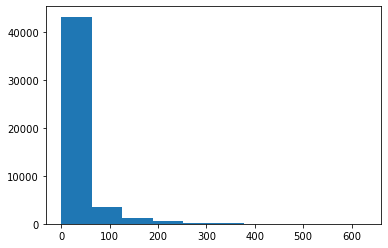

In [39]:
# need to convert some columns to numerics
data["price"] = pd.to_numeric(data["price"])
# plotting simple plots to see overall distribution
plt.hist(data["price"])
plt.hist(data["number_of_reviews"])

In [44]:
# create pivot table 
# interested in looking at the price based on location and room type
output = pd.pivot_table(data = data, 
              index = ['room_type'], 
              columns=['neighbourhood_group'], 
              values = 'price', 
              aggfunc='mean')
output

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,127.506596,178.327545,249.239109,147.050573,173.846591
Private room,66.788344,76.500099,116.776622,71.762456,62.292553
Shared room,59.800000,50.527845,88.977083,69.020202,57.444444


In [46]:
# using the groupby feature
data.groupby(['neighbourhood_group']).mean()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,
Bronx,2.273492e+07,1.056099e+08,40.848305,-73.884552,87.496792,4.560953,26.004583,1.837831,2.233731,165.758937
Brooklyn,1.825685e+07,5.671526e+07,40.685036,-73.951190,124.383207,6.056556,24.202845,1.283212,2.284371,100.232292
Manhattan,1.877494e+07,6.783062e+07,40.765062,-73.974607,196.875814,8.579151,20.985596,1.272131,12.791330,111.979410
Queens,2.175500e+07,9.615680e+07,40.731531,-73.872775,99.517649,5.181433,27.700318,1.941200,4.060184,144.451818
Staten Island,2.159747e+07,9.853360e+07,40.610225,-74.105805,114.812332,4.831099,30.941019,1.872580,2.319035,199.678284


In [ ]:
# RESULTS
# Overall, from analyzing this dataset, we can see that Manhattan is the most expensive borough to rent an Airbnb from, based on our pivot table 
# as well as the groupby feature. Entire homes/apt are the most expensive to rent out and shared room is the cheapest.
# In Manhattan, the minimum nights per stay is around 8 nights, while in the Bronx and Staten Island, 
# the minimum number of nights is around 4. Interestingly, Staten Island and Queens
# have the highest mean number of reviews. In addition, Staten Island contains the most availabilites, while
# Brooklyn has the lowest number of available rentals. To answer my questions, 
# the most expensive borough to rent from is Manhattan and there is no apparent correlation between
# review number and availbility. 